<a href="https://colab.research.google.com/github/dyjs-js/DaconStudy/blob/main/FIFA/fifa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/dyjs-js/DACONstudy/main/data/fifa/FIFA_train.csv
!wget https://raw.githubusercontent.com/dyjs-js/DaconStudy/main/data/fifa/FIFA_test.csv
!wget https://raw.githubusercontent.com/dyjs-js/DACONstudy/main/data/fifa/submission.csv


--2023-01-09 15:38:02--  https://raw.githubusercontent.com/dyjs-js/DACONstudy/main/data/fifa/FIFA_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 597439 (583K) [text/plain]
Saving to: ‘FIFA_train.csv’

FIFA_train.csv      100%[===================>] 583.44K  --.-KB/s    in 0.04s   

2023-01-09 15:38:03 (13.5 MB/s) - ‘FIFA_train.csv’ saved [597439/597439]

--2023-01-09 15:38:03--  https://raw.githubusercontent.com/dyjs-js/DaconStudy/main/data/fifa/FIFA_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220162 (215K) 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

#데이터 살펴보기

In [ ]:
train=pd.read_csv('FIFA_train.csv')
test=pd.read_csv('FIFA_test.csv')
smpl_sub=pd.read_csv('submission.csv')

In [ ]:
print(train.shape)
print(test.shape)

(8932, 12)
(3828, 11)



id : 선수 고유의 아이디</br>
name : 이름(object)</br>
age : 나이</br>
continent : 선수들의 국적이 포함되어 있는 대륙입니다(object)</br>
contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다(object)</br>
position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등(object)</br>
prefer_foot : 선수가 선호하는 발입니다. ex) 오른발(object)</br>
reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수</br>
stat_overall : 선수의 현재 능력치 입니다.</br>
stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.</br>
stat_skill_moves : 선수의 개인기 능력치 입니다.</br>
value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다</br>

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3828 non-null   int64  
 1   name              3828 non-null   object 
 2   age               3828 non-null   int64  
 3   continent         3828 non-null   object 
 4   contract_until    3828 non-null   object 
 5   position          3828 non-null   object 
 6   prefer_foot       3828 non-null   object 
 7   reputation        3828 non-null   float64
 8   stat_overall      3828 non-null   int64  
 9   stat_potential    3828 non-null   int64  
 10  stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 329.1+ KB


In [ ]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [ ]:
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


In [ ]:
#null 값 확인
train.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [ ]:
test.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
dtype: int64

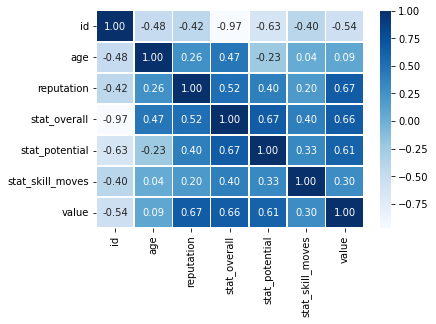

In [ ]:


#상관관계
plt.figure()
sns.heatmap(data=train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

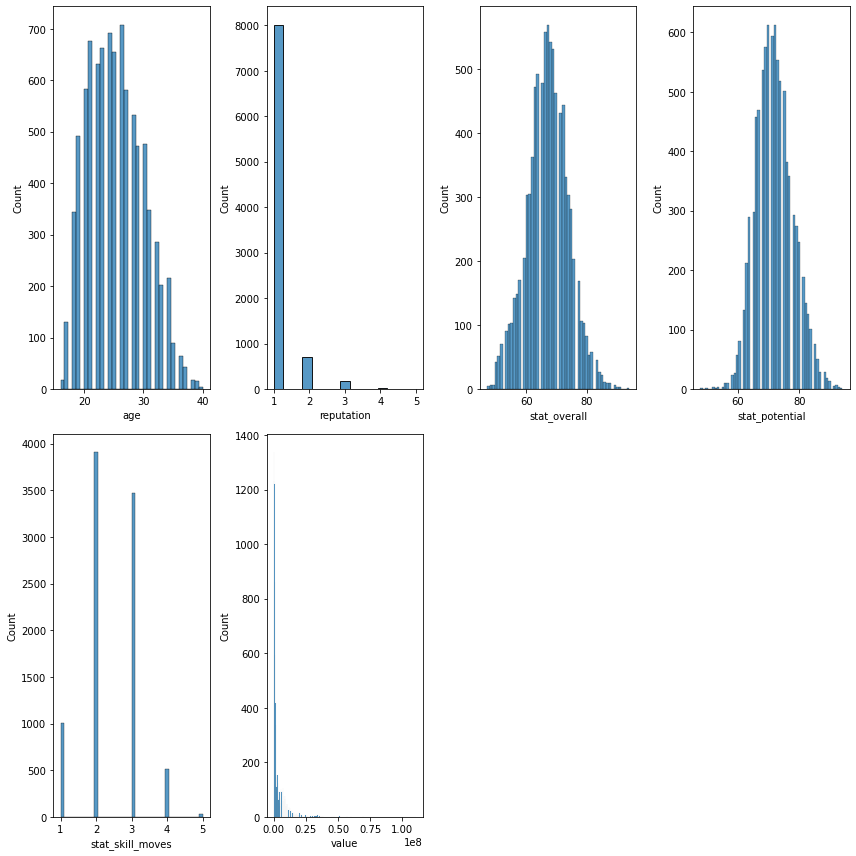

In [ ]:
plt.figure(figsize=(12,12))

cols=train.columns[7:].insert(0,'age')
for i in range(len(cols)):
    plt.subplot(2,4,i+1)
    sns.histplot(train[cols[i]])
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'value logscale histogram')]

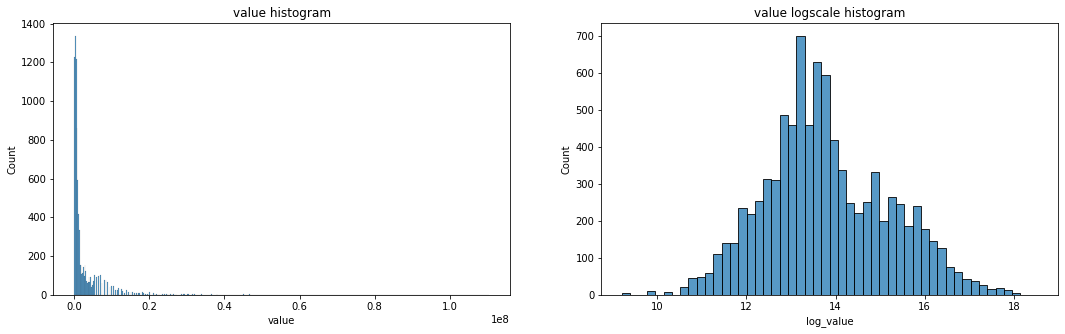

In [ ]:
# 이적 시장 가격 비교
f , axes = plt.subplots(1,2)
axes = axes.flatten()
f.set_size_inches(18,5)

# 이적료에 log
train["log_value"] = np.log(train["value"])

sns.histplot(x="value", data=train, ax=axes[0])
axes[0].set(title = "value histogram")
sns.histplot(x="log_value", data=train, ax=axes[1])
axes[1].set(title = "value logscale histogram")

#log를 취했음에도 편차가 매우 큼

In [ ]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,log_value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,18.520526
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,18.092177
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,18.197537
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,17.747336
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,18.035018


#데이터전처리

In [ ]:
#id  name 컬럼은 불필요하므로 삭제
train.drop(['id','name'], axis=1, inplace=True)
test.drop(['id','name'], axis=1, inplace=True)


In [ ]:
train['contract_until'].value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [ ]:
#계약년도만 추출
train['contract_until']=train['contract_until'].str[-4:].astype(int)
test['contract_until']=test['contract_until'].str[-4:].astype(int)

In [ ]:
train['contract_until'].value_counts()

2019    2899
2021    2308
2020    2051
2022     761
2023     506
2018     391
2024      12
2025       3
2026       1
Name: contract_until, dtype: int64

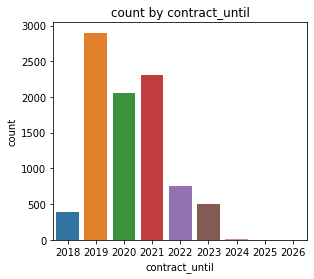

In [ ]:
plt.figure(figsize=(10,4))
ax=plt.subplot(1,2,1)
sns.countplot(x='contract_until',data=train)
plt.title("count by contract_until")

plt.show()

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3828 non-null   int64  
 1   continent         3828 non-null   object 
 2   contract_until    3828 non-null   int64  
 3   position          3828 non-null   object 
 4   prefer_foot       3828 non-null   object 
 5   reputation        3828 non-null   float64
 6   stat_overall      3828 non-null   int64  
 7   stat_potential    3828 non-null   int64  
 8   stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 269.3+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   int64  
 1   continent         8932 non-null   object 
 2   contract_until    8932 non-null   int64  
 3   position          8932 non-null   object 
 4   prefer_foot       8932 non-null   object 
 5   reputation        8932 non-null   float64
 6   stat_overall      8932 non-null   int64  
 7   stat_potential    8932 non-null   int64  
 8   stat_skill_moves  8932 non-null   float64
 9   value             8932 non-null   float64
 10  log_value         8932 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 767.7+ KB


In [ ]:
#원핫인코딩 continent, position, prefer_foot, reputation
train=pd.get_dummies(columns=['continent', 'position','prefer_foot'], data=train)
test=pd.get_dummies(columns=['continent', 'position','prefer_foot'], data=test)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      8932 non-null   int64  
 1   contract_until           8932 non-null   int64  
 2   reputation               8932 non-null   float64
 3   stat_overall             8932 non-null   int64  
 4   stat_potential           8932 non-null   int64  
 5   stat_skill_moves         8932 non-null   float64
 6   value                    8932 non-null   float64
 7   log_value                8932 non-null   float64
 8   continent_africa         8932 non-null   uint8  
 9   continent_asia           8932 non-null   uint8  
 10  continent_europe         8932 non-null   uint8  
 11  continent_oceania        8932 non-null   uint8  
 12  continent_south america  8932 non-null   uint8  
 13  position_DF              8932 non-null   uint8  
 14  position_GK             

In [ ]:
train['value']=np.log1p(train['value'])

In [ ]:
train.drop(['log_value'], axis=1, inplace=True)

In [ ]:
X= train.drop(['value'],axis=1)
Y= train['value']

In [ ]:
X.shape, Y.shape

((8932, 17), (8932,))

In [ ]:
X[['age','reputation', 'stat_potential']] = np.log1p(X[['age','reputation', 'stat_potential']])
test[['age','reputation', 'stat_potential']] = np.log1p(test[['age','reputation', 'stat_potential']])

In [ ]:
# 스케일링
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
test = pd.DataFrame(scaler.fit_transform(test), columns = test.columns)


#학습

In [ ]:
#evaluation을 위해서 train데이터를 train와 valid로 다시 쪼개기
x_train,x_valid,y_train,y_valid=train_test_split(X,Y,test_size=0.2, shuffle=True,random_state=5)

In [ ]:
#train 데이터와 valid 데이터 shape 확인
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((7145, 17), (1787, 17), (7145,), (1787,))

##RandomForestRegressor

In [ ]:
#make a model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

RandomForest=RandomForestRegressor(n_estimators=250,random_state = 5)
RandomForest.fit(x_train,y_train)
y_pred=RandomForest.predict(x_valid)

neg_mse_scores = cross_val_score(RandomForest, X, Y, scoring="neg_mean_squared_error", cv = 10)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

mse=mean_squared_error(y_valid,y_pred)
mae=mean_absolute_error(y_valid,y_pred)

print('mse:',mse)
print('mae:', mae)
print('RandomForestRegressor 10-folds의 개별 RMSE : ', np.round(rmse_scores, 2))
print('RandomForestRegressor 10-folds의 평균 RMSE : {0:.3f} '.format(avg_rmse))
#
#mse: 0.007530068741871694
#mae: 0.04843860388159924
#RandomForestRegressor 10-folds의 개별 RMSE :  [0.74 0.26 0.22 0.24 0.12 0.12 0.16 0.16 0.3  0.56]
#RandomForestRegressor 10-folds의 평균 RMSE : 0.288 

mse: 0.007530068741871694
mae: 0.04843860388159924
RandomForestRegressor 10-folds의 개별 RMSE :  [0.74 0.26 0.22 0.24 0.12 0.12 0.16 0.16 0.3  0.56]
RandomForestRegressor 10-folds의 평균 RMSE : 0.288 


##catboost

In [ ]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 5.6 MB/s eta 0:00:00


In [ ]:
from catboost import Pool, CatBoostRegressor

In [ ]:
cbr=CatBoostRegressor(random_state = 5, silent = True, depth = 3 ,n_estimators=250)

cbr.fit(x_train,y_train)
y_pred=cbr.predict(x_valid)

neg_mse_scores = cross_val_score(cbr, X, Y, scoring="neg_mean_squared_error", cv = 10)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

mse=mean_squared_error(y_valid,y_pred)
mae=mean_absolute_error(y_valid,y_pred)

print('mse:',mse)
print('mae:', mae)
print('CatBoostRegressor 10-folds의 개별 RMSE : ', np.round(rmse_scores, 2))
print('CatBoostRegressor 10-folds의 평균 RMSE : {0:.3f} '.format(avg_rmse))
#mse: 0.005004203278747389
#mae: 0.051004738985387155
#CatBoostRegressor 10-folds의 개별 RMSE :  [0.64 0.17 0.17 0.34 0.1  0.11 0.09 0.13 0.25 0.5 ]
#CatBoostRegressor 10-folds의 평균 RMSE : 0.251 

mse: 0.005004203278747389
mae: 0.051004738985387155
CatBoostRegressor 10-folds의 개별 RMSE :  [0.64 0.17 0.17 0.34 0.1  0.11 0.09 0.13 0.25 0.5 ]
CatBoostRegressor 10-folds의 평균 RMSE : 0.251 


#실제 데이터로 randomForest 적용

## RandomForestRegressor

In [ ]:
#make a model
RandomForest=RandomForestRegressor(n_estimators=300,random_state = 5)
RandomForest.fit(X,Y)
y_pred_RF=RandomForest.predict(test)


##catboost

In [ ]:
cbr=CatBoostRegressor(random_state = 5, silent = True, depth = 3 ,n_estimators=300)
cbr.fit(X,Y)
y_pred_cbr=cbr.predict(test)

##제출

In [ ]:
smpl_sub['value']=y_pred_RF+y_pred_cbr/2

In [ ]:
smpl_sub

,id,value
0,1,26.651546
1,2,27.287188
2,4,27.147933
3,5,27.137449
4,6,26.816413
...,...,...
3823,16924,16.476581
3824,16929,16.217300
3825,16932,16.485300
3826,16937,16.123379


In [ ]:
smpl_sub['value']=np.expm1['value']

TypeError: ignored

In [ ]:
y_pred=np.expm1(y_pred)

In [ ]:
y_pred

array([inf, inf, inf, ..., inf, inf, inf])

In [ ]:
y_pred=np.expm1(y_pred)

<ipython-input-279-66ea4d2778a8>:1: RuntimeWarning: overflow encountered in expm1
  y_pred=np.expm1(y_pred)


In [ ]:
smpl_sub

,id,value
0,1,inf
1,2,inf
2,4,inf
3,5,inf
4,6,inf
...,...,...
3823,16924,inf
3824,16929,inf
3825,16932,inf
3826,16937,inf


In [ ]:
smpl_sub['value']=y_pred

In [ ]:
smpl_sub

,id,value
0,1,inf
1,2,inf
2,4,inf
3,5,inf
4,6,inf
...,...,...
3823,16924,inf
3824,16929,inf
3825,16932,inf
3826,16937,inf


In [ ]:
smpl_sub.to_csv('submission.csv', index=False)

In [ ]:
# exp함수사용해서 value값 원래대로 바꿔주기 1669879.48501

#grieSearchCv

In [ ]:
from sklearn.model_selection import GridSearchCV
random_forest_tuning = RandomForestRegressor()
param_grid = {
    'max_depth': [1,3,5],
    'n_estimators':[50,150,300],
}


In [ ]:
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5,refit=True )
GSCV.fit(X, Y)
print('best parameter : ',GSCV.best_params_ )
print('best score : ', GSCV.best_score_)

best parameter :  {'max_depth': 5, 'n_estimators': 150}
best score :  -0.4521818917604684


In [ ]:
pred=GSCV.predict(x_valid)

In [ ]:

mse=mean_squared_error(y_valid,pred)
mae=mean_absolute_error(y_valid,pred)
print(mse)
print(mae)

#0.009062869863896992
#0.0652376553066257

#0.004304542026805944
#0.049644971766217225

#0.05289030933794627
#0.17733163346810635

#0.05108444732343557
#0.17450609972033732

0.05108444732343557
0.17450609972033732


In [ ]:
#실제데이터
pred=GSCV.predict(test)

In [ ]:
pred

array([17.4892499 , 17.49515113, 17.49515113, ..., 11.00758096,
       10.63502825, 10.63502825])

In [ ]:
pred=np.expm1(pred)

In [ ]:
pred

array([39398956.03521191, 39632145.63704926, 39632145.63704926, ...,
          60328.770244  ,    41564.60284018,    41564.60284018])

In [ ]:
smpl_sub['value']=pred

In [ ]:
smpl_sub

,id,value
0,1,4.044957e+07
1,2,4.044957e+07
2,4,4.044957e+07
3,5,4.044957e+07
4,6,4.044957e+07
...,...,...
3823,16924,4.864302e+04
3824,16929,5.930657e+04
3825,16932,5.930657e+04
3826,16937,4.394771e+04


#RandomizedSearch CV 적용


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_forest_tuning=RandomForestRegressor()

In [ ]:
GSCV = RandomizedSearchCV(estimator = random_forest_tuning, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [ ]:
GSCV.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [ ]:
GSCV.best_params_ 

{'n_estimators': 33,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': True}

In [ ]:
pred=GSCV.predict(x_valid)

In [ ]:
mse=mean_squared_error(y_valid,pred)
mae=mean_absolute_error(y_valid,pred)
print(mse)
print(mae)

#0.009062869863896992
#0.0652376553066257

#0.004304542026805944
#0.049644971766217225

#0.05289030933794627
#0.17733163346810635

#0.05108444732343557
#0.17450609972033732

#0.08837599950715519
#0.22368591201523938


0.08837599950715519
0.22368591201523938


In [ ]:
pred=GSCV.predict(test)

In [ ]:
pred

array([17.13911334, 17.13911334, 17.13911334, ..., 11.02945504,
       11.00865931, 11.00865931])

In [ ]:
pred=np.expm1(pred)

In [ ]:
pred

array([27760183.57658019, 27760183.57658019, 27760183.57658019, ...,
          61662.96752162,    60393.86196539,    60393.86196539])

In [ ]:
rf_RandomGrid.fit(X, Y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [ ]:
emt=GSCV.best_estimator_
pred=emt.predict(test)

In [ ]:
pred

array([18.14657953, 18.09395688, 17.99423437, ..., 10.87243372,
       10.58607227, 10.59192287])

In [ ]:
# pred=RandomForestCV.predict(test)

In [ ]:
pred=np.expm1(pred)

In [ ]:
smpl_sub['value']=pred

In [ ]:
smpl_sub

,id,value
0,1,7.191796e+07
1,2,6.488419e+07
2,4,6.081054e+07
3,5,6.209376e+07
4,6,5.695552e+07
...,...,...
3823,16924,4.470432e+04
3824,16929,5.100611e+04
3825,16932,5.499738e+04
3826,16937,3.962522e+04


In [ ]:
smpl_sub.to_csv('submission.csv', index=False)

In [ ]:
mse=mean_squared_error(y_valid,pred)
mae=mean_absolute_error(y_valid,pred)
print(mse)
print(mae)

#1차 447635831793.5613
#176963.8644065162

#2차 [213]
mse=mean_squared_error(y_valid,pred)
mae=mean_absolute_error(y_valid,pred)
print(mse)
print(mae)

#1차 447635831793.5613
#176963.8644065162

#2차 
#1871145220785.5723
#517124.42424740875

1871145220785.5723
517124.42424740875


In [ ]:
x_train.shape , y_train.shape, test.shape, x_valid.shape, y_valid.shape

((7145, 18), (7145,), (3828, 17), (1787, 18), (1787,))

In [ ]:
test.shape

(3828, 17)

In [ ]:
pred=GSCV.predict(test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- log_value

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
pred['value']=pred

In [ ]:
smpl

https://dacon.io/codeshare/1841 